<p>I have created a new notebook that will serve as an overall record to my progress.  The results from the previous "Selecting Giants..." code have been adapted here.  I have implemented David's suggestion using numpy.where to make cuts in the data.  This has been done in the interest of efficiency  </p>

In [2]:
#Load astropy
from astropy.io import fits
from astropy.table import Table
import numpy

#Load data
spec2 = Table(fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\ssppOut-dr10.fits.gz',1))

#Making cuts in LAMOST data
ind=numpy.where((spec2['TEFF_ADOP']>4050)
    &(spec2['TEFF_ADOP']<5875)
    &(spec2['LOGG_ADOP']<3.8)
    &(spec2['LOGG_ADOP']>0)
    &((spec2['LOGG_ADOP']-1.86)/(spec2['TEFF_ADOP']- 4035)<0.00345))
    
spec2r=spec2[ind]

<IPython.core.display.Javascript object>


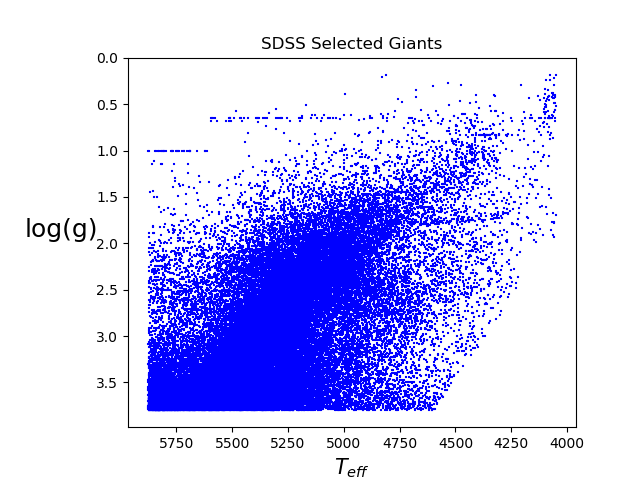

In [6]:
#Plotting logg vs Teff for SDSS data
%matplotlib nbagg
import matplotlib.pyplot as plt
y=spec2r['LOGG_ADOP']
x=spec2r['TEFF_ADOP']

#plt.figure(figsize=(18,18))
plt.scatter(x,y,marker='+',c='blue',s=3)
plt.xlabel('$T_{eff}$',fontsize=15)
plt.ylabel('log(g)',rotation='horizontal',labelpad=25,fontsize=18)
plt.gcf().subplots_adjust(left=0.20)
#plt.xlim(3000,7000)
#plt.ylim(0,6)
plt.figsize=(18,16)

ax=plt.gca()
ax.invert_xaxis()
ax.invert_yaxis()

plt.title('SDSS Selected Giants')

plt.show()

In [ ]:
spec2r.write('ssppgiants.fits', format='fits')

<p>Here I demonstrate that it is unnecessary to make cuts in the LAMOST data as the giants have already been selected  </p>

<IPython.core.display.Javascript object>


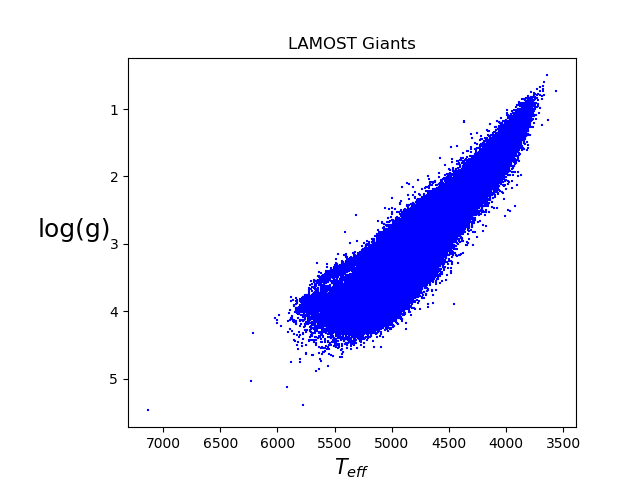

In [3]:
#Load astropy
from astropy.io import fits
from astropy.table import Table
import numpy

#Load LAMOST data
spec3 = Table(fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\Ho2017_Catalog.fits',1))

#Plotting logg vs Teff for LAMOST data
%matplotlib nbagg
import matplotlib.pyplot as plt
y=spec3['logg']
x=spec3['Teff']

#plt.figure(figsize=(18,18))
plt.scatter(x,y,marker='+',c='blue',s=3)
plt.xlabel('$T_{eff}$',fontsize=15)
plt.ylabel('log(g)',rotation='horizontal',labelpad=25,fontsize=18)
plt.gcf().subplots_adjust(left=0.20)
#plt.xlim(3000,7000)
#plt.ylim(0,6)
plt.figsize=(18,16)

ax=plt.gca()
ax.invert_xaxis()
ax.invert_yaxis()

plt.title('LAMOST Giants')

plt.show()

<p>I explored the use of over-density plots rather than scatter plots to show more detail in my graphs. (The LAMOST plot took several hours due to the number of data points). I employed the function gaussian_kde from scipy in order to calculate point density. </p>

<IPython.core.display.Javascript object>


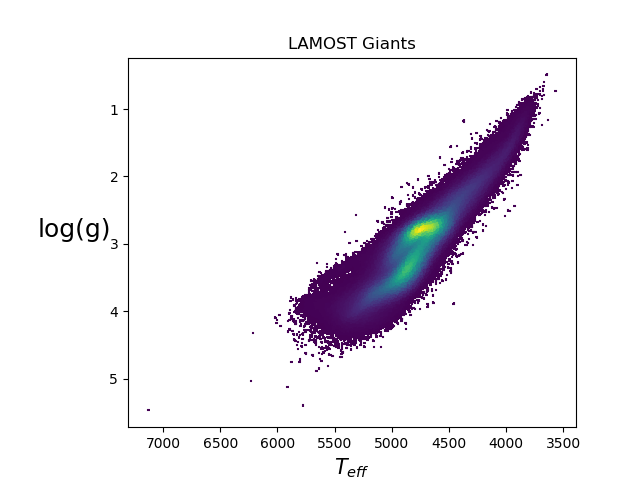

In [14]:
#Load libraries and functions
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
from scipy.stats import gaussian_kde

#Load LAMOST data
spec3 = Table(fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\Ho2017_Catalog.fits',1))

#Plotting logg vs Teff for LAMOST data
%matplotlib nbagg
import matplotlib.pyplot as plt
y=spec3['logg']
x=spec3['Teff']

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

#plt.figure(figsize=(18,18))
plt.scatter(x,y,c=z,marker='+',s=3)
plt.xlabel('$T_{eff}$',fontsize=15)
plt.ylabel('log(g)',rotation='horizontal',labelpad=25,fontsize=18)
plt.gcf().subplots_adjust(left=0.20)
#plt.xlim(3000,7000)
#plt.ylim(0,6)
plt.figsize=(18,16)

ax=plt.gca()
ax.invert_xaxis()
ax.invert_yaxis()

plt.title('LAMOST Giants')

plt.show()

<IPython.core.display.Javascript object>


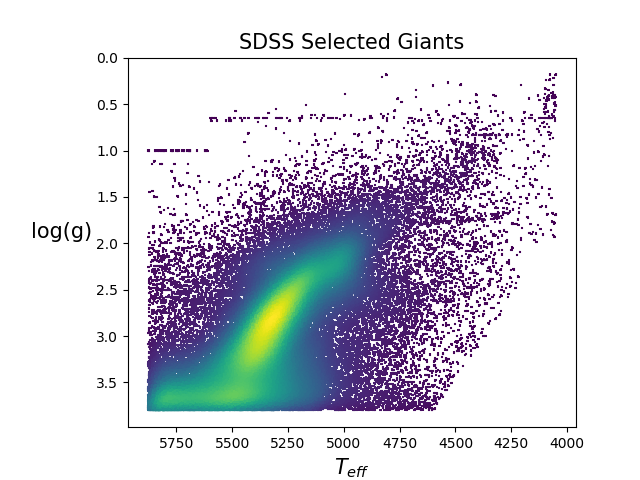

In [3]:
#Plotting logg vs Teff for SDSS data
#Load libraries and functions
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
from scipy.stats import gaussian_kde
%matplotlib nbagg
import matplotlib.pyplot as plt

#Define axes/variables
y=spec2r['LOGG_ADOP']
x=spec2r['TEFF_ADOP']

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

#Scatter plot
plt.scatter(x,y,c=z,marker='+',s=3)
plt.xlabel('$T_{eff}$',fontsize=15)
plt.ylabel('log(g)',rotation='horizontal',labelpad=25,fontsize=15)
plt.gcf().subplots_adjust(left=0.20)
plt.figsize=(18,16)
ax=plt.gca()
ax.invert_xaxis()
ax.invert_yaxis()
plt.title('SDSS Selected Giants',fontsize=15)

plt.show()

<p> I loaded the Munn data and prepared for cross-matching. </p>

<IPython.core.display.Javascript object>


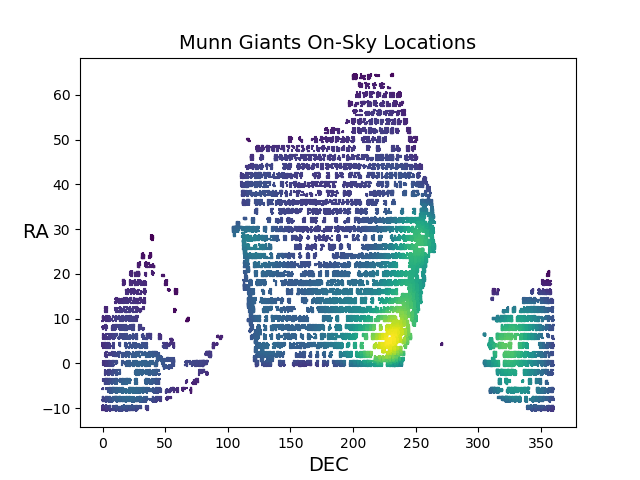

In [4]:
#Plotting RA vs. DEC for Munn data alone
#Load libraries and functions
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
from scipy.stats import gaussian_kde
%matplotlib nbagg
import matplotlib.pyplot as plt

#Import DDO51 photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants.fits',1)

#Set variables for RA and DEC as y and x
y1=phot['DEC']
x1=phot['RA']

# Calculate the point density for Munn Giants
xy = np.vstack([x1,y1])
z = gaussian_kde(xy)(xy)

#Scatter plot
plt.scatter(x1,y1,c=z,marker='+',s=3)
plt.xlabel('DEC',fontsize=14)
plt.ylabel('RA',rotation='horizontal',fontsize=14)
plt.figsize=(18,16)
ax=plt.gca()
plt.title('Munn Giants On-Sky Locations',fontsize=14)

plt.show()

<p>I then loaded the SDSS fitz file with the cuts I had made previously, and cross-matched with the DDO51 photometric data. </p>

In [2]:
#Load libraries and functions
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

#Import DDO51 photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants.fits',1)

#Import the calibration data (i.e. SDSS with cuts)
spec = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\ssppgiants.fits',1)

#Cross-matching
from astropy.coordinates import SkyCoord
from astropy import units as u

#defines on-sky locations of photometric data and spectroscopic data as variables
c_phot=SkyCoord(ra=phot['RA']*u.degree,dec=phot['DEC']*u.degree)
c_spec=SkyCoord(ra=spec['RA']*u.degree,dec=spec['DEC']*u.degree)

#d2d represents on-sky distances
idx, d2d, d3d = c_phot.match_to_catalog_sky(c_spec) 
good=(d2d.arcsec < .1)

In [ ]:
cmssppgiants=phot[good]
cmssppgiants.columns

<p>Plotted the photometric and spectroscopic star locations separately and after cross-matching for comparison.</p>

<IPython.core.display.Javascript object>


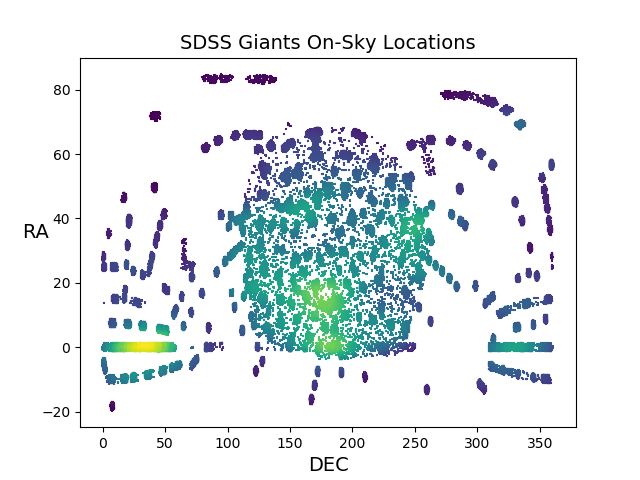

In [7]:
#Import libraries and functions
from scipy.stats import kde
from scipy.stats import gaussian_kde
%matplotlib nbagg

#Set variables for RA and DEC of spec data as y and x
y2=spec['DEC']
x2=spec['RA']

# Calculate the point density for SDSS giants
xy = np.vstack([x2,y2])
z = gaussian_kde(xy)(xy)

#Scatter plot of SDSS sky locations
plt.scatter(x2,y2,c=z,marker='+',s=3)
plt.xlabel('DEC',fontsize=14)
plt.ylabel('RA',rotation='horizontal',fontsize=14)
plt.figsize=(18,16)
plt.title('SDSS Giants On-Sky Locations',fontsize=14)

plt.show()

<IPython.core.display.Javascript object>


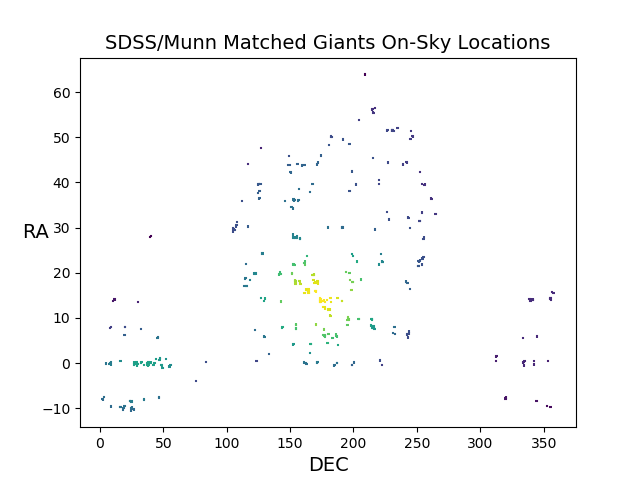

In [8]:
#Import libraries and functions
%matplotlib nbagg

#Set variables for RA and DEC of matched data as y and x
y3=cmssppgiants['DEC']
x3=cmssppgiants['RA']

# Calculate the point density for matched giants
xy1 = np.vstack([x3,y3])
z = gaussian_kde(xy1)(xy1)

#Scatter plot of matched sky locations
plt.scatter(x3,y3,c=z,marker='+',s=3)
plt.xlabel('DEC',fontsize=14)
plt.ylabel('RA',rotation='horizontal',fontsize=14)
plt.figsize=(18,16)
ax=plt.gca()
plt.title('SDSS/Munn Matched Giants On-Sky Locations',fontsize=14)

plt.show()